In [7]:
%matplotlib inline

In [8]:
from __future__ import print_function

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

import pandas as pd

In [9]:
train_df = pd.read_csv('data/x_train.csv', sep=';', encoding='utf-8')
test_df = pd.read_csv('data/x_test.csv', sep=';', encoding='utf-8')
train_y = pd.read_csv('data/y_train.csv', sep=';', encoding='utf-8', header=None)

train_df['target'] = train_y
train_df, train_y = shuffle(train_df, train_y, random_state=42)

train_df.head()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed,target
4843,8,9,1,10,15.111111,0,2,0.500000,1939000,1875,20,2,0
14687,2,3,1,3,5.000000,0,0,0.000000,251000,500,6,1,0
19666,6,7,1,11,9.333333,0,2,0.500000,1199000,1500,18,1,0
25092,11,12,2,15,14.000000,0,2,0.500000,2865000,2100,29,1,0
3703,27,28,1,65,16.740741,0,14,0.571429,6999000,4925,64,4,0


Функция scatter_matrix из модуля pandas.tools.plotting позволяет построить для каждой количественной переменной гистограмму, а для каждой пары таких переменных – диаграмму рассеяния:

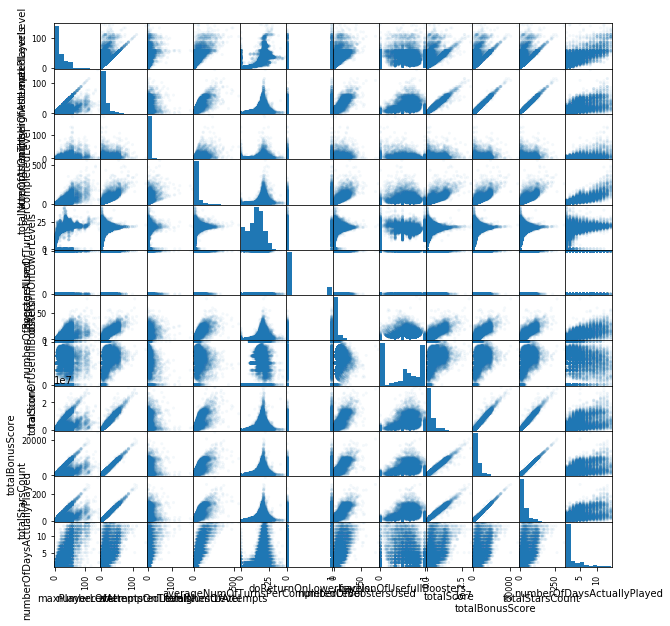

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_X, alpha=0.05, figsize=(10, 10));

Посмотрим как отдельные признаки коррелируют между собой

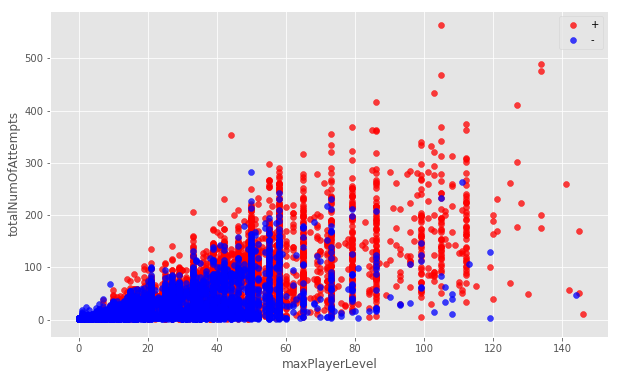

In [13]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
col1 = 'maxPlayerLevel'
col2 = 'totalNumOfAttempts'

plt.figure(figsize=(10, 6))

plt.scatter(train_df[col1][train_df['target'] == 1],
            train_df[col2][train_df['target'] == 1],
            alpha=0.75,
            color='red',
            label='+')

plt.scatter(train_df[col1][train_df['target'] == 0],
            train_df[col2][train_df['target'] == 0],
            alpha=0.75,
            color='blue',
            label='-')

plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best');

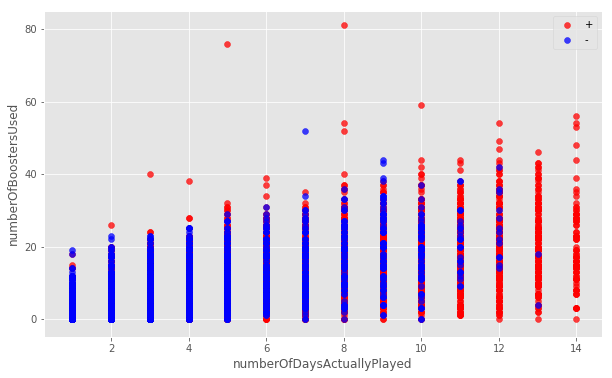

In [14]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
col1 = 'numberOfDaysActuallyPlayed'
col2 = 'numberOfBoostersUsed'

plt.figure(figsize=(10, 6))

plt.scatter(train_df[col1][train_df['target'] == 1],
            train_df[col2][train_df['target'] == 1],
            alpha=0.75,
            color='red',
            label='+')

plt.scatter(train_df[col1][train_df['target'] == 0],
            train_df[col2][train_df['target'] == 0],
            alpha=0.75,
            color='blue',
            label='-')

plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best');

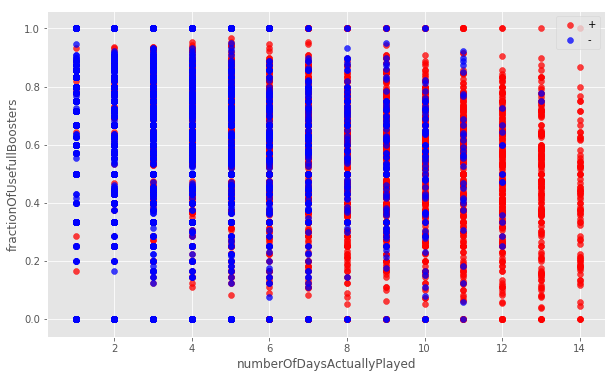

In [15]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
col1 = 'numberOfDaysActuallyPlayed'
col2 = 'fractionOfUsefullBoosters'

plt.figure(figsize=(10, 6))

plt.scatter(train_df[col1][train_df['target'] == 1],
            train_df[col2][train_df['target'] == 1],
            alpha=0.75,
            color='red',
            label='+')

plt.scatter(train_df[col1][train_df['target'] == 0],
            train_df[col2][train_df['target'] == 0],
            alpha=0.75,
            color='blue',
            label='-')

plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best');

С помощью метода describe() получим некоторую сводную информацию по всей таблице. По умолчанию будет выдана информация только для количественных признаков. Это общее их количество (count), среднее значение (mean), стандартное отклонение (std), минимальное (min), макcимальное (max) значения, медиана (50%) и значения нижнего (25%) и верхнего (75%) квартилей:

train_X.describe()

In [16]:
train_X.corr()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
maxPlayerLevel,1.000000,0.616157,0.472142,0.757854,0.683706,0.368297,0.675955,0.126235,0.570234,0.551366,0.579593,0.793385
numberOfAttemptedLevels,0.616157,1.000000,0.300797,0.836398,0.531197,0.290636,0.881915,0.332887,0.979954,0.989014,0.993779,0.663450
attemptsOnTheHighestLevel,0.472142,0.300797,1.000000,0.532032,0.277072,0.197035,0.389465,-0.041700,0.277326,0.264804,0.281343,0.524109
totalNumOfAttempts,0.757854,0.836398,0.532032,1.000000,0.509510,0.391969,0.836706,0.128843,0.798051,0.795570,0.808989,0.846448
averageNumOfTurnsPerCompletedLevel,0.683706,0.531197,0.277072,0.509510,1.000000,0.250261,0.543847,0.457168,0.499681,0.489411,0.514770,0.555594
doReturnOnLowerLevels,0.368297,0.290636,0.197035,0.391969,0.250261,1.000000,0.320439,0.071646,0.310218,0.271397,0.288803,0.383024
numberOfBoostersUsed,0.675955,0.881915,0.389465,0.836706,0.543847,0.320439,1.000000,0.203519,0.854263,0.851824,0.862254,0.751712
fractionOfUsefullBoosters,0.126235,0.332887,-0.041700,0.128843,0.457168,0.071646,0.203519,1.000000,0.328287,0.358474,0.358219,0.058929
totalScore,0.570234,0.979954,0.277326,0.798051,0.499681,0.310218,0.854263,0.328287,1.000000,0.985111,0.986423,0.617847
totalBonusScore,0.551366,0.989014,0.264804,0.795570,0.489411,0.271397,0.851824,0.358474,0.985111,1.000000,0.997357,0.606864


## Пропущенные значения

Узнать количество заполненных (непропущенных) элементов можно с помощью метода count. Параметр axis = 0 указывает, что мы двигаемся по размерности 0 (сверху вниз), а не размерности 1 (слева направо), т.е. нас интересует количество заполненных элементов в каждом столбце, а не строке:

In [17]:
train_X.count(axis=0)

maxPlayerLevel                        25289
numberOfAttemptedLevels               25289
attemptsOnTheHighestLevel             25289
totalNumOfAttempts                    25289
averageNumOfTurnsPerCompletedLevel    25289
doReturnOnLowerLevels                 25289
numberOfBoostersUsed                  25289
fractionOfUsefullBoosters             25289
totalScore                            25289
totalBonusScore                       25289
totalStarsCount                       25289
numberOfDaysActuallyPlayed            25289
dtype: int64

Вывод - пропуенные значения отсутсвуют.

# Сравните качество логистической регресии с и без предварительной нормализации признаков.

In [18]:
train_y=train_df['target']
clf = Pipeline([
    ('normalizer', StandardScaler()),
    ('clf', LogisticRegression()),
])

score = cross_val_score(clf, train_X, train_y, scoring='log_loss', cv=8, n_jobs=-1)

clf.fit(train_X, train_y)
prediction_probas = clf.predict_proba(test_X)[:,1]

print("{} +/- {}".format(score.mean(), score.std()))

-0.3996467633354616 +/- 0.009827315773762696


Конспект

Логистическая регрессия — одно из статистических методов классификации с использованием линейного дискриминанта Фишера.
Значением функции является вероятность того, что данное исходное значение принадлежит к определенному классу.
механизм обучения логистической регрессии старается максимизировать среднее значение image.

In [19]:
train_y=train_df['target']
clf = Pipeline([
    ('clf', LogisticRegression()),
])

score = cross_val_score(clf, train_X, train_y, scoring='log_loss', cv=8, n_jobs=-1)

clf.fit(train_X, train_y)
prediction_probas = clf.predict_proba(test_X)[:,1]

print("{} +/- {}".format(score.mean(), score.std()))

-0.5526619191370762 +/- 0.013881768509631314


# Random Forest – случайный лес¶

In [20]:
train_y=train_df['target']
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=300, random_state=11)
rf.fit(train_X, train_y)

prediction_probas = rf.predict_proba(test_X)[:,1]
train_y = pd.DataFrame({'probability': prediction_probas})
train_y.to_csv('predictions/submissionRANDFOR.csv', header=None, index=None, encoding='utf-8')


Запустить алгоритм с разными seed и взять средний результат.(лучший результат эта штучка не дала, но идея прикольная)

In [21]:
import numpy as np
import pandas as pd
train_y=train_df['target']
from sklearn.ensemble import RandomForestClassifier
runs = 1000
results = np.zeros((runs, test_X.shape[0]))
for i in range(runs):
    clf = RandomForestClassifier(random_state=2707+i)
    clf.fit(train_X, train_y)
results[i, :]=clf.predict_proba(test_X)[:,1]
result = results.mean(axis=0)
print(result)

[  0.00000000e+00   0.00000000e+00   6.00000000e-04 ...,   0.00000000e+00
   4.00000000e-04   6.02949901e-05]


In [22]:

train_y = pd.DataFrame({'probability': result})
train_y.to_csv('predictions/11111.csv', header=None, index=None, encoding='utf-8')

In [23]:

#prediction_probas = gbt.predict_proba(test_X)[:,1]
#train_y = pd.DataFrame({'probability': prediction_probas})
#train_y.to_csv('predictions/submission4.csv', header=None, index=None, encoding='utf-8')

много раз выбрать случайно параметр из данного отрезка, померить качество алгоритма при данном параметре и выбрать тем самым луйший:

Поиск оптимальных значений параметров можно осуществить с помощью класса GridSearchCV – поиск наилучшего набора параметров, доставляющих минимум ошибке перекрестного контроля (cross-validation). По умолчанию рассматривается 3-кратный перекрестный контроль.

In [24]:
import numpy as np
train_y=train_df['target']
from scipy.stats import uniform as sp_rand
from sklearn.linear_model import Ridge
from sklearn.grid_search import RandomizedSearchCV
# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(train_X, train_y)

prediction_probas = rsearch.predict_proba(test_X)[:,1]
train_y = pd.DataFrame({'probability': prediction_probas})
train_y.to_csv('predictions/22222.csv', header=None, index=None, encoding='utf-8')
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

E:\install\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
E:\install\anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


AttributeError: 'Ridge' object has no attribute 'predict_proba'

# DecisionTreeClassifier

In [ ]:
train_y=train_df['target']
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=10)
score = cross_val_score(tree, train_X, train_y, scoring='log_loss', cv=8, n_jobs=-1)
tree.fit(train_X, train_y)

prediction_probas = tree.predict_proba(test_X)[:,1]

print("{} +/- {}".format(score.mean(), score.std()))
#print (tree)
#print (tree.score(train_X, train_y))

In [ ]:
train_y = pd.DataFrame({'probability': prediction_probas})
train_y.to_csv('predictions/submission1.csv', header=None, index=None, encoding='utf-8')

In [ ]:
train_y=train_df['target']
clf = Pipeline([
    ('normalizer', StandardScaler()),
    ('clf', LogisticRegression()),
])

score = cross_val_score(clf, train_X, train_y, scoring='log_loss', cv=8, n_jobs=-1)

clf.fit(train_X, train_y)
prediction_probas = clf.predict_proba(test_X)[:,1]

print("{} +/- {}".format(score.mean(), score.std()))

Отбор значимых признаков осуществляется как «вручную» — на основе анализа содержательной постановки задачи, так и «автоматически» — с помощью универсальных алгоритмов.

Отбор признаков «вручную» (как и «ручной» синтез новых признаков) — важный этап в анализе данных. К сожалению, нам не известны содержательные значения используемых в рассматриваемой задаче признаков, поэтому ограничимся только их автоматическим отбором. Для этого существует много различных алгоритмов. Рассмотрим только один из них – с помощью случайного леса.

Все, что нужно сделать, – это после вызова метода predict для случайного леса прочитать поле feature_importances_. Для каждого признака это поле содержит число, выражающее «важность» этого признака. Чем больше число, тем значимее признак. Сумма всех чисел равна 1.

Упорядочим значимости и выведем их значения:

In [ ]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
# fit a CART model to the data
model = DecisionTreeClassifier()
model.fit(train_X, train_df['target'])
print(model)
# make predictions
expected = train_df['target']
predicted = model.predict(train_X)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

In [ ]:
import numpy as np
feature_names = train_X.columns
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(train_X, train_df['target'])

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

In [ ]:
d_first = 12
plt.figure(figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [ ]:
best_features = indices[:8]
best_features_names = feature_names[best_features]
print(best_features_names)


# GBT – градиентный бустинг деревьев решений¶ (BEST)

In [25]:
train_y=train_df['target']
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(train_X, train_y)

prediction_probas = gbt.predict_proba(test_X)[:,1]
train_y = pd.DataFrame({'probability': prediction_probas})
train_y.to_csv('predictions/submission4.csv', header=None, index=None, encoding='utf-8')

Просто добавь кросс-валидацию

In [57]:
train_y=train_df['target']
from sklearn import ensemble
gbt = Pipeline([
    ('normalizer', StandardScaler()),
    ('gbt', ensemble.GradientBoostingClassifier(learning_rate=0.06761662249589584,n_estimators=100, random_state=42)),
])

score = cross_val_score(gbt, train_X, train_y, scoring='log_loss', cv=8, n_jobs=-1)
gbt.fit(train_X, train_y)
prediction_probas = gbt.predict_proba(test_X)[:,1]




-1.076919383911891 +/- 0.09775078738076082


In [59]:
score = cross_val_score(gbt, train_X, train_y, scoring='accuracy', cv=8, n_jobs=-1)

print("{} +/- {}".format(score.mean(), score.std()))

0.8287002672914539 +/- 0.004806652592037991


In [27]:
gbt.get_params().keys()

dict_keys(['memory', 'steps', 'normalizer', 'gbt', 'normalizer__copy', 'normalizer__with_mean', 'normalizer__with_std', 'gbt__criterion', 'gbt__init', 'gbt__learning_rate', 'gbt__loss', 'gbt__max_depth', 'gbt__max_features', 'gbt__max_leaf_nodes', 'gbt__min_impurity_decrease', 'gbt__min_impurity_split', 'gbt__min_samples_leaf', 'gbt__min_samples_split', 'gbt__min_weight_fraction_leaf', 'gbt__n_estimators', 'gbt__presort', 'gbt__random_state', 'gbt__subsample', 'gbt__verbose', 'gbt__warm_start'])

In [70]:
from sklearn.model_selection import GridSearchCV
parameters = {  
              'gbt_loss' : ('deviance', 'exponential')
}

gs_clf = GridSearchCV(gbt, parameters, n_jobs=-1)

In [71]:
gs_clf = gs_clf.fit(train_X, train_y)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
E:\install\anaconda\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...onda\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
E:\install\anaconda\lib\runpy.py in _run_code(code=<code object <module> at 0x000000ECE7D5F300, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'E:\install\anaconda\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'E:\install\anaconda\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...onda\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'E:\\install\...da\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...onda\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x000000ECE7D5F300, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'E:\install\anaconda\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'E:\install\anaconda\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...onda\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'E:\\install\...da\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
E:\install\anaconda\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
E:\install\anaconda\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
E:\install\anaconda\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
E:\install\anaconda\lib\site-packages\zmq\eventloop\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
E:\install\anaconda\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
E:\install\anaconda\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
E:\install\anaconda\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
E:\install\anaconda\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
E:\install\anaconda\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
E:\install\anaconda\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
E:\install\anaconda\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
E:\install\anaconda\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'gs_clf = gs_clf.fit(train_X, train_y)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 11, 11, 10, 32, 27, 739504, tzinfo=datetime.timezone.utc), 'msg_id': '7F70088E54F9411E97C3C0E1D2BE062D', 'msg_type': 'execute_request', 'session': 'CD18DC5098B04A23882EA6D7C93AE57C', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '7F70088E54F9411E97C3C0E1D2BE062D', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'CD18DC5098B04A23882EA6D7C93AE57C']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'gs_clf = gs_clf.fit(train_X, train_y)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 11, 11, 10, 32, 27, 739504, tzinfo=datetime.timezone.utc), 'msg_id': '7F70088E54F9411E97C3C0E1D2BE062D', 'msg_type': 'execute_request', 'session': 'CD18DC5098B04A23882EA6D7C93AE57C', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '7F70088E54F9411E97C3C0E1D2BE062D', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
E:\install\anaconda\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'CD18DC5098B04A23882EA6D7C93AE57C'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'gs_clf = gs_clf.fit(train_X, train_y)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 11, 11, 10, 32, 27, 739504, tzinfo=datetime.timezone.utc), 'msg_id': '7F70088E54F9411E97C3C0E1D2BE062D', 'msg_type': 'execute_request', 'session': 'CD18DC5098B04A23882EA6D7C93AE57C', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '7F70088E54F9411E97C3C0E1D2BE062D', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
E:\install\anaconda\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='gs_clf = gs_clf.fit(train_X, train_y)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'gs_clf = gs_clf.fit(train_X, train_y)'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
E:\install\anaconda\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('gs_clf = gs_clf.fit(train_X, train_y)',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('gs_clf = gs_clf.fit(train_X, train_y)',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
E:\install\anaconda\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='gs_clf = gs_clf.fit(train_X, train_y)', store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
E:\install\anaconda\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>], cell_name='<ipython-input-71-c7df9bf4fa7f>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at ecf0895e10, execution..._before_exec=None error_in_exec=None result=None>)
   2816 
   2817         try:
   2818             for i, node in enumerate(to_run_exec):
   2819                 mod = ast.Module([node])
   2820                 code = compiler(mod, cell_name, "exec")
-> 2821                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000000ECF5DE8810, file "<ipython-input-71-c7df9bf4fa7f>", line 1>
        result = <ExecutionResult object at ecf0895e10, execution..._before_exec=None error_in_exec=None result=None>
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])

...........................................................................
E:\install\anaconda\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000000ECF5DE8810, file "<ipython-input-71-c7df9bf4fa7f>", line 1>, result=<ExecutionResult object at ecf0895e10, execution..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000000ECF5DE8810, file "<ipython-input-71-c7df9bf4fa7f>", line 1>
        self.user_global_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "get_ipython().magic('matplotlib inline')", 'from __future__ import print_function\n\nfrom skle...el import LogisticRegression\n\nimport pandas as pd', "train_df = pd.read_csv('data/x_train.csv', sep='...in_df, train_y, random_state=42)\n\ntrain_df.head()", 'text_clf.get_params().keys()', 'gbt.get_params().keys()', "train_y=train_df['target']\nfrom sklearn import e...rediction_probas = gbt.predict_proba(test_X)[:,1]", "get_ipython().magic('matplotlib inline')", 'from __future__ import print_function\n\nfrom skle...el import LogisticRegression\n\nimport pandas as pd', "train_df = pd.read_csv('data/x_train.csv', sep='...in_df, train_y, random_state=42)\n\ntrain_df.head()", 'features = [column for column in train_df.column...nt("{} +/- {}".format(score.mean(), score.std()))', "prediction_probas = clf.predict_proba(test_X)[:,....csv', header=None, index=None, encoding='utf-8')", 'from pandas.plotting import scatter_matrix\nscatter_matrix(train_X, alpha=0.05, figsize=(10, 10));', "import matplotlib.pyplot as plt\nplt.style.use('g...el(col1)\nplt.ylabel(col2)\nplt.legend(loc='best');", "import matplotlib.pyplot as plt\nplt.style.use('g...el(col1)\nplt.ylabel(col2)\nplt.legend(loc='best');", "import matplotlib.pyplot as plt\nplt.style.use('g...el(col1)\nplt.ylabel(col2)\nplt.legend(loc='best');", 'train_X.corr()', 'train_X.count(axis=0)', 'train_y=train_df[\'target\']\nclf = Pipeline([\n    ...nt("{} +/- {}".format(score.mean(), score.std()))', 'train_y=train_df[\'target\']\nclf = Pipeline([\n    ...nt("{} +/- {}".format(score.mean(), score.std()))', ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {3:        maxPlayerLevel  numberOfAttemptedLevels  ...  0  
3703                            4       0  , 9:        maxPlayerLevel  numberOfAttemptedLevels  ...  0  
3703                            4       0  , 16:                                     maxPlayerLev...uallyPlayed                            1.000000  , 17: maxPlayerLevel                        25289
numb...fDaysActuallyPlayed            25289
dtype: int64, 27: dict_keys(['memory', 'steps', 'normalizer', 'gbt...__subsample', 'gbt__verbose', 'gbt__warm_start']), 30: RandomizedSearchCV(cv=None, error_score='raise',...e, refit=True,
          scoring=None, verbose=0)}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'RandomizedSearchCV': <class 'sklearn.grid_search.RandomizedSearchCV'>, 'Ridge': <class 'sklearn.linear_model.ridge.Ridge'>, 'StandardScaler': <class 'sklearn.preprocessing.data.StandardScaler'>, '_': RandomizedSearchCV(cv=None, error_score='raise',...e, refit=True,
          scoring=None, verbose=0), ...}
        self.user_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "get_ipython().magic('matplotlib inline')", 'from __future__ import print_function\n\nfrom skle...el import LogisticRegression\n\nimport pandas as pd', "train_df = pd.read_csv('data/x_train.csv', sep='...in_df, train_y, random_state=42)\n\ntrain_df.head()", 'text_clf.get_params().keys()', 'gbt.get_params().keys()', "train_y=train_df['target']\nfrom sklearn import e...rediction_probas = gbt.predict_proba(test_X)[:,1]", "get_ipython().magic('matplotlib inline')", 'from __future__ import print_function\n\nfrom skle...el import LogisticRegression\n\nimport pandas as pd', "train_df = pd.read_csv('data/x_train.csv', sep='...in_df, train_y, random_state=42)\n\ntrain_df.head()", 'features = [column for column in train_df.column...nt("{} +/- {}".format(score.mean(), score.std()))', "prediction_probas = clf.predict_proba(test_X)[:,....csv', header=None, index=None, encoding='utf-8')", 'from pandas.plotting import scatter_matrix\nscatter_matrix(train_X, alpha=0.05, figsize=(10, 10));', "import matplotlib.pyplot as plt\nplt.style.use('g...el(col1)\nplt.ylabel(col2)\nplt.legend(loc='best');", "import matplotlib.pyplot as plt\nplt.style.use('g...el(col1)\nplt.ylabel(col2)\nplt.legend(loc='best');", "import matplotlib.pyplot as plt\nplt.style.use('g...el(col1)\nplt.ylabel(col2)\nplt.legend(loc='best');", 'train_X.corr()', 'train_X.count(axis=0)', 'train_y=train_df[\'target\']\nclf = Pipeline([\n    ...nt("{} +/- {}".format(score.mean(), score.std()))', 'train_y=train_df[\'target\']\nclf = Pipeline([\n    ...nt("{} +/- {}".format(score.mean(), score.std()))', ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {3:        maxPlayerLevel  numberOfAttemptedLevels  ...  0  
3703                            4       0  , 9:        maxPlayerLevel  numberOfAttemptedLevels  ...  0  
3703                            4       0  , 16:                                     maxPlayerLev...uallyPlayed                            1.000000  , 17: maxPlayerLevel                        25289
numb...fDaysActuallyPlayed            25289
dtype: int64, 27: dict_keys(['memory', 'steps', 'normalizer', 'gbt...__subsample', 'gbt__verbose', 'gbt__warm_start']), 30: RandomizedSearchCV(cv=None, error_score='raise',...e, refit=True,
          scoring=None, verbose=0)}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'RandomizedSearchCV': <class 'sklearn.grid_search.RandomizedSearchCV'>, 'Ridge': <class 'sklearn.linear_model.ridge.Ridge'>, 'StandardScaler': <class 'sklearn.preprocessing.data.StandardScaler'>, '_': RandomizedSearchCV(cv=None, error_score='raise',...e, refit=True,
          scoring=None, verbose=0), ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
C:\Users\Viktoria\Desktop\data-analysis-course-bsu-mmf-2017-master\Lab_02\Task\<ipython-input-71-c7df9bf4fa7f> in <module>()
----> 1 gs_clf = gs_clf.fit(train_X, train_y)

...........................................................................
E:\install\anaconda\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=None, error_score='raise',
     ...train_score=True,
       scoring=None, verbose=0), X=       maxPlayerLevel  numberOfAttemptedLevels  ...                   5  

[25289 rows x 12 columns], y=       probability
0         0.105626
1         ...7747
25288     0.028847

[25289 rows x 1 columns], groups=None, **fit_params={})
    633                                   return_train_score=self.return_train_score,
    634                                   return_n_test_samples=True,
    635                                   return_times=True, return_parameters=False,
    636                                   error_score=self.error_score)
    637           for parameters, (train, test) in product(candidate_params,
--> 638                                                    cv.split(X, y, groups)))
        cv.split = <bound method _BaseKFold.split of KFold(n_splits=3, random_state=None, shuffle=False)>
        X =        maxPlayerLevel  numberOfAttemptedLevels  ...                   5  

[25289 rows x 12 columns]
        y =        probability
0         0.105626
1         ...7747
25288     0.028847

[25289 rows x 1 columns]
        groups = None
    639 
    640         # if one choose to see train score, "out" will contain train score info
    641         if self.return_train_score:
    642             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
E:\install\anaconda\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Sat Nov 11 13:32:35 2017
PID: 186196                    Python 3.6.1: E:\install\anaconda\python.exe
...........................................................................
E:\install\anaconda\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (Pipeline(memory=None,
     steps=[('normalizer',....0, verbose=0,
              warm_start=False))]),        maxPlayerLevel  numberOfAttemptedLevels  ...                   5  

[25289 rows x 12 columns],        probability
0         0.105626
1         ...7747
25288     0.028847

[25289 rows x 1 columns], {'score': <function _passthrough_scorer>}, array([ 8430,  8431,  8432, ..., 25286, 25287, 25288]), array([   0,    1,    2, ..., 8427, 8428, 8429]), 0, {'gbt_loss': 'deviance'}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
E:\install\anaconda\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (Pipeline(memory=None,
     steps=[('normalizer',....0, verbose=0,
              warm_start=False))]),        maxPlayerLevel  numberOfAttemptedLevels  ...                   5  

[25289 rows x 12 columns],        probability
0         0.105626
1         ...7747
25288     0.028847

[25289 rows x 1 columns], {'score': <function _passthrough_scorer>}, array([ 8430,  8431,  8432, ..., 25286, 25287, 25288]), array([   0,    1,    2, ..., 8427, 8428, 8429]), 0, {'gbt_loss': 'deviance'})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
E:\install\anaconda\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=Pipeline(memory=None,
     steps=[('normalizer',....0, verbose=0,
              warm_start=False))]), X=       maxPlayerLevel  numberOfAttemptedLevels  ...                   5  

[25289 rows x 12 columns], y=       probability
0         0.105626
1         ...7747
25288     0.028847

[25289 rows x 1 columns], scorer={'score': <function _passthrough_scorer>}, train=array([ 8430,  8431,  8432, ..., 25286, 25287, 25288]), test=array([   0,    1,    2, ..., 8427, 8428, 8429]), verbose=0, parameters={'gbt_loss': 'deviance'}, fit_params={}, return_train_score=True, return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    418                       for k, v in fit_params.items()])
    419 
    420     test_scores = {}
    421     train_scores = {}
    422     if parameters is not None:
--> 423         estimator.set_params(**parameters)
        estimator.set_params = <bound method Pipeline.set_params of Pipeline(me...0, verbose=0,
              warm_start=False))])>
        parameters = {'gbt_loss': 'deviance'}
    424 
    425     start_time = time.time()
    426 
    427     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
E:\install\anaconda\lib\site-packages\sklearn\pipeline.py in set_params(self=Pipeline(memory=None,
     steps=[('normalizer',....0, verbose=0,
              warm_start=False))]), **kwargs={'gbt_loss': 'deviance'})
    139 
    140         Returns
    141         -------
    142         self
    143         """
--> 144         self._set_params('steps', **kwargs)
        self._set_params = <bound method _BaseComposition._set_params of Pi...0, verbose=0,
              warm_start=False))])>
        kwargs = {'gbt_loss': 'deviance'}
    145         return self
    146 
    147     def _validate_steps(self):
    148         names, estimators = zip(*self.steps)

...........................................................................
E:\install\anaconda\lib\site-packages\sklearn\utils\metaestimators.py in _set_params(self=Pipeline(memory=None,
     steps=[('normalizer',....0, verbose=0,
              warm_start=False))]), attr='steps', **params={'gbt_loss': 'deviance'})
     44         names, _ = zip(*getattr(self, attr))
     45         for name in list(six.iterkeys(params)):
     46             if '__' not in name and name in names:
     47                 self._replace_estimator(attr, name, params.pop(name))
     48         # 3. Step parameters and other initilisation arguments
---> 49         super(_BaseComposition, self).set_params(**params)
        self.set_params = <bound method Pipeline.set_params of Pipeline(me...0, verbose=0,
              warm_start=False))])>
        params = {'gbt_loss': 'deviance'}
     50         return self
     51 
     52     def _replace_estimator(self, attr, name, new_val):
     53         # assumes `name` is a valid estimator name

...........................................................................
E:\install\anaconda\lib\site-packages\sklearn\base.py in set_params(self=Pipeline(memory=None,
     steps=[('normalizer',....0, verbose=0,
              warm_start=False))]), **params={'gbt_loss': 'deviance'})
    278                 # simple objects case
    279                 if key not in valid_params:
    280                     raise ValueError('Invalid parameter %s for estimator %s. '
    281                                      'Check the list of available parameters '
    282                                      'with `estimator.get_params().keys()`.' %
--> 283                                      (key, self.__class__.__name__))
        key = 'gbt_loss'
        self.__class__.__name__ = 'Pipeline'
    284                 setattr(self, key, value)
    285         return self
    286 
    287     def __repr__(self):

ValueError: Invalid parameter gbt_loss for estimator Pipeline. Check the list of available parameters with `estimator.get_params().keys()`.
___________________________________________________________________________

In [56]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

gbt__n_estimators: 55


In [60]:

train_y = pd.DataFrame({'probability': prediction_probas})
train_y.to_csv('predictions/new.csv', header=None, index=None, encoding='utf-8')

Дальше идут пробы различных туториалов для Scikit-Learn

Нормализация данных

Всем хорошо знакомо, что большинство градиентных методов (на которых по-сути и основаны почти все алгоритмы машинного обучения) сильно чуствительны к шкалированию данных. Поэтому перед запуском алгоритмов чаще всего делается либо нормализация, либо так называемая стандартизация. Нормализация предполагает замену номинальных признаков так, чтобы каждый из них лежал в диапазоне от 0 до 1. Стандартизация же подразумевает такую предобработку данных, после которой каждый признак имеет среднее 0 и дисперсию 1. В Scikit-Learn уже есть готовые для этого функции:

In [ ]:
from sklearn import preprocessing
# normalize the data attributes
normalized_X = preprocessing.normalize(train_X)
# standardize the data attributes
standardized_X = preprocessing.scale(train_X)

Отбор признаков

Не секрет, что зачастую самым важным при решении задачи является умение правильно отобрать и даже создать признаки. В англоязычной литературе это называется Feature Selection и Feature Engineering. В то время как Future Engineering довольно творческий процесс и полагается больше на интуицию и экспертные знания, для Feature Selection есть уже большое количество готовых алгоритмов. «Древесные» алгоритмы допускают расчета информативности признаков:

In [ ]:
train_y=train_df['target']

from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(train_X, train_y)
# display the relative importance of each attribute
print(model.feature_importances_)

Все остальные методы так или иначе основаны на эффективном переборе подмножеств признаков с целью найти наилучшее подмножество, на которых построенная модель дает наилучшее качество. Одним из таких алгоритмов перебора является Recursive Feature Elimination алгоритм, который также доступен в библиотеке Scikit-Learn:

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(train_X, train_y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
import numpy as np
from scipy.stats import uniform as sp_rand
from sklearn.linear_model import Ridge
from sklearn.grid_search import RandomizedSearchCV
# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(train_X, train_y)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb
random_forest_classifier = rsearch.best_estimator_
decision_tree_classifier = rsearch.best_estimator_
#grid_search.fit(all_inputs, all_classes)
rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, train_X,train_y, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier,train_X,train_y, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sb.boxplot(x='classifier', y='accuracy', data=both_df)
sb.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='white')

clf.fit(train_X, train_y)
prediction_probas = clf.predict_proba(test_X)[:,1]
print("{} +/- {}".format(score.mean(), score.std()))
train_y = pd.DataFrame({'probability': prediction_probas})
train_y.to_csv('predictions/submission.csv', header=None, index=None, encoding='utf-8')


In [ ]:
a=[0,1,2,3,4]
best_features = indices[a]
best_features_names = feature_names[best_features]

import numpy as np
feature_names = train_X.columns
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(train_X, train_df['target'])

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
best_features = indices[a]
best_features_names = feature_names[best_features]


Тут я взяла сначала два самых важных признака, по очереди добавляла остальные, если прогноз ухудшался - то признак отбрасывался. Лучше не стало.

In [ ]:
print(indices[a])


In [ ]:

train_y=train_df['target']
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(train_X[best_features_names], train_y)

prediction_probas = gbt.predict_proba(test_X[best_features_names])[:,1]
train_y = pd.DataFrame({'probability': prediction_probas})
train_y.to_csv('predictions/submissionimp.csv', header=None, index=None, encoding='utf-8')

err_train = np.mean(train_df['target'] != gbt.predict(train_X[best_features_names]))
err_test = np.mean(prediction_probas  != gbt.predict(test_X[best_features_names]))
print(err_train, err_test)


In [ ]:
%matplotlib inline
train_y=train_df['target']

import pandas as pd
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

#train_df = pd.read_csv('data/x_train.csv', sep=';', encoding='utf-8')
#test_df = pd.read_csv('data/x_test.csv', sep=';', encoding='utf-8')
#train_y = pd.read_csv('data/y_train.csv', sep=';', encoding='utf-8', header=None)

random_forest_classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                max_depth=None, max_features=3, max_leaf_nodes=None,
                                min_samples_leaf=1, min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
                                oob_score=False, random_state=None, verbose=0, warm_start=True)

# All that's left to do now is plot the cross-validation scores
#rf_classifier_scores = cross_val_score(random_forest_classifier, train_X, train_y, cv=10)
#sb.boxplot(rf_classifier_scores)
#sb.stripplot(rf_classifier_scores, jitter=True, color='white')

# ...and show some of the predictions from the classifier
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(train_X, train_y, train_size=0.75)

random_forest_classifier.fit(training_inputs, training_classes)

prediction_probas = random_forest_classifier.predict_proba(test_X)[:,1]

print("{} +/- {}".format(score.mean(), score.std()))
train_y = pd.DataFrame({'probability': prediction_probas})
train_y.to_csv('predictions/submission.csv', header=None, index=None, encoding='utf-8')

In [ ]:
import numpy as np
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from datetime import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
import random


train_y=train_df['target']

from sklearn.preprocessing import MinMaxScaler
submiss = pd.read_csv('data/x_test.csv', sep=';', encoding='utf-8')
cols_to_drop = ['ID', 'TARGET']
cols = list(set(train_X.columns) - set(cols_to_drop))
scaler_reg = MinMaxScaler((-1, 1))
scaler_reg.fit(np.vstack((train_X[cols], submiss[cols])))
X_train_reg = scaler_reg.transform(train_X[cols])
submiss_reg = scaler_reg.transform(submiss[cols])

In [ ]:

train_y=train_df['target']
bst5 = LogisticRegression()
bst5.fit(X_train_reg, train_y)

In [ ]:
train_y=train_df['target']
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(train_X, train_y)



In [ ]:

t3 = np.asarray([[i] for i in  gbt.predict_proba(train_X)[:,1]])
t5 = np.asarray([[i] for i in  clf.predict_proba(train_X)[:,1]])
tst_data = np.hstack((
    t3,
    t5,
))


itog = np.mean(tst_data , axis=1)

sub_df = pd.DataFrame(data=train_df['target'])
sub_df.to_csv('itog.csv', index=False, header=False)



